In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import metrics
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
import time
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./data/feature03.csv')
df = df.sample(frac=1).reset_index(drop=True)
y = df.loan_status
x = df.drop(['loan_status'],axis = 1,inplace=False)

In [3]:
print(df.loan_status.value_counts())

x.head()

0.0    34116
1.0     5670
Name: loan_status, dtype: int64


,Unnamed: 0,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,28581,10141.459843,11.86,229.50,35000.0,8.85,15360.0,69.6,13426.24,10350.00,3419.88,0.0,0.00,0.0,248.57
1,28981,4000.000000,14.35,137.40,39996.0,6.27,3032.0,62.5,4946.37,4000.00,946.37,0.0,0.00,0.0,148.90
2,12068,23975.000000,17.99,609.32,78000.0,12.71,0.0,0.0,36520.33,24000.00,12558.41,0.0,0.00,0.0,608.53
3,26288,3200.000000,16.82,79.22,93000.0,16.62,34825.0,86.0,1188.30,566.19,615.66,0.0,6.45,0.0,79.22
4,21491,19950.000000,17.43,717.35,101000.0,14.91,23156.0,83.3,25761.56,20000.00,5826.12,0.0,0.00,0.0,769.78


In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

lr = LogisticRegression()
# lr.score(X, y, sample_weight)
start= time.time()
lr.fit(x_train, y_train)
train_predict = lr.predict(x_train)
train_f1 = metrics.f1_score(train_predict, y_train)
train_acc = metrics.accuracy_score(train_predict, y_train)
train_rec = metrics.recall_score(train_predict, y_train)
print("逻辑回归模型上的效果入下：")
print("在训练集上f1_mean的值为%.4f" % train_f1, end=' ')
print("在训练集上的精确率的值为%.4f" % train_acc, end=' ')
print("在训练集上的查全率的值为%.4f" % train_rec)
test_predict = lr.predict(x_test)
test_f1 = metrics.f1_score(test_predict, y_test)
test_acc = metrics.accuracy_score(test_predict, y_test)
test_rec = metrics.recall_score(test_predict, y_test)
print("在测试集上f1_mean的值为%.4f" % test_f1, end = ' ')
print("在测试集上的精确率的值为%.4f" % test_acc, end=' ')
print("在测试集上的查全率的值为%.4f" % test_rec)
end = time.time()
print(end-start)

print("随机森林的效果如下" + "=" * 30)
rf = RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
train_predict = rf.predict(x_train)
train_f1 = metrics.f1_score(train_predict, y_train)
train_acc = metrics.accuracy_score(train_predict, y_train)
train_rec = metrics.recall_score(train_predict, y_train)
print("在训练集上f1_mean的值为%.4f" % train_f1, end=' ')
print("在训练集上的精确率的值为%.4f" % train_acc, end=' ')
print("在训练集上的查全率的值为%.4f" % train_rec)
test_predict = rf.predict(x_test)
test_f1 = metrics.f1_score(test_predict, y_test)
test_acc = metrics.accuracy_score(test_predict, y_test)
test_rec = metrics.recall_score(test_predict, y_test)
print("在测试集上f1_mean的值为%.4f" % test_f1, end = ' ')
print("在测试集上的精确率的值为%.4f" % test_acc, end=' ')
print("在测试集上的查全率的值为%.4f" % test_rec)
end = time.time()
print(end - start)

print("GBDT上效果如下" + "=" * 30)
gb = GradientBoostingClassifier()
start = time.time()
gb.fit(x_train, y_train)
train_predict = gb.predict(x_train)
train_f1 = metrics.f1_score(train_predict, y_train)
train_acc = metrics.accuracy_score(train_predict, y_train)
train_rec = metrics.recall_score(train_predict, y_train)
print("在训练集上f1_mean的值为%.4f" % train_f1, end=' ')
print("在训练集上的精确率的值为%.4f" % train_acc, end=' ')
print("在训练集上的查全率的值为%.4f" % train_rec)
test_predict = gb.predict(x_test)
test_f1 = metrics.f1_score(test_predict, y_test)
test_acc = metrics.accuracy_score(test_predict, y_test)
test_rec = metrics.recall_score(test_predict, y_test)
print("在测试集上f1_mean的值为%.4f" % test_f1, end = ' ')
print("在测试集上的精确率的值为%.4f" % test_acc, end=' ')
print("在测试集上的查全率的值为%.4f" % test_rec)
end = time.time()
print(end-start)

逻辑回归模型上的效果入下：
在训练集上f1_mean的值为0.9903 在训练集上的精确率的值为0.9972 在训练集上的查全率的值为0.9987
在测试集上f1_mean的值为0.9890 在测试集上的精确率的值为0.9970 在测试集上的查全率的值为0.9972
0.45240092277526855
随机森林的效果如下==============================
在训练集上f1_mean的值为0.9993 在训练集上的精确率的值为0.9998 在训练集上的查全率的值为1.0000
在测试集上f1_mean的值为0.9945 在测试集上的精确率的值为0.9985 在测试集上的查全率的值为1.0000
0.5618035793304443
GBDT上效果如下==============================
在训练集上f1_mean的值为0.9997 在训练集上的精确率的值为0.9999 在训练集上的查全率的值为1.0000
在测试集上f1_mean的值为0.9945 在测试集上的精确率的值为0.9985 在测试集上的查全率的值为0.9973
3.625607490539551


['Unnamed: 0' 'int_rate' 'total_rec_int' 'last_pymnt_amnt'
 'total_pymnt_inv' 'funded_amnt_inv' 'installment' 'total_rec_prncp'
 'collection_recovery_fee' 'recoveries']


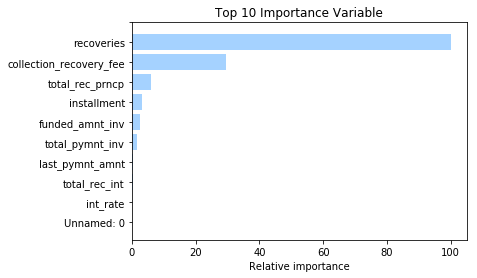

In [5]:
feature_importance = rf.feature_importances_#度量特征权重的接口
# print(feature_importance)
# print(feature_importance.max())
feature_importance = 100.0*(feature_importance/feature_importance.max())
index = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[index], color = 'dodgerblue', alpha = 0.4)
print(np.array(x.columns)[index])
plt.yticks(np.arange(10+0.25), np.array(x.columns)[index])
plt.xlabel('Relative importance')
plt.title('Top 10 Importance Variable')
plt.show() 

In [6]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.4,random_state=6)
x_train,x_test,y_train,y_test=train_test_split(x_test1,y_test1,test_size=0.2,random_state=6)

print("支持向量机的效果如下" + "=" * 30)
sv = svm.SVC(C = 1,kernel = 'linear') #C = 1, probability = True, decision_function_shape = 'ovo', random_state = 0

sv.fit(x_train, y_train)
test_predict = sv.predict(x_test)
test_f1 = metrics.f1_score(test_predict, y_test)
test_acc = metrics.accuracy_score(test_predict, y_test)
test_rec = metrics.recall_score(test_predict, y_test)
print("在测试集上f1_mean的值为%.4f" % test_f1, end = ' ')
print("在测试集上的精确率的值为%.4f" % test_acc, end=' ')
print("在测试集上的查全率的值为%.4f" % test_rec)

支持向量机的效果如下==============================
在测试集上f1_mean的值为0.9929 在测试集上的精确率的值为0.9981 在测试集上的查全率的值为1.0000
